## Statistical Inference: Monte-Carlo, Bootstrapping, Means tests

This project represents the simulation examples of application of Monte-Carlo analysis in 2 dice rolling game, Bootstrap applicatoin in A/B test, and the test hypothesis on different sample means.

In [1]:
# loading traditional packages
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# check the current working directory
os.getcwd()

'C:\\Users\\danil'

In [3]:
# loading functions from separate modules (.py files)
import bootstrap as bs
import compare_functions as bs_compare
import stats_functions as bs_stats

### A comment on *random seed*

In [4]:
np.random.seed(seed=34566)
d1 = np.random.uniform(low=0, high=1, size=5)
print(d1)

[0.02846465 0.40359399 0.99449276 0.20369776 0.30760988]


## 1. MONTE-CARLO ANALYSIS

In [5]:
### Monte-Carlo experiment for the 2 dice rolling game

# set parameters
n = 100 # sample size
m = 10000 # number of iterations

# create a list for storing average values
averageS = []

# run the experiment
for i in range(m):
    
    # 1.
    np.random.seed(seed=i)
    
    d1 = np.round(np.random.uniform(low=1, high=6, size=n))
    d2 = np.round(np.random.uniform(low=1, high=6, size=n))
    S = d1+d2
    
    # 2.
    averageS.extend([np.mean(S)])

# preview first several results
averageS[:5]

[6.98, 6.87, 6.65, 6.87, 7.34]

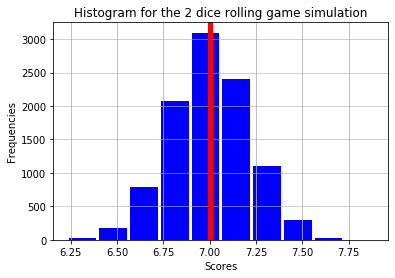

In [6]:
### Construction of the histogram for the Monte-Carlo experiment

# transform the np-array into a pandas series
averageS_pd = pd.Series(averageS)

# making a histogram
averageS_pd.plot.hist(grid=True, rwidth=0.9, color='blue')

# adding a line for the 'true' mean
plt.axvline(x=7, color="red", linewidth=5)

# adding labels and lines
plt.title('Histogram for the 2 dice rolling game simulation')
plt.xlabel('Scores')
plt.ylabel('Frequencies')
plt.grid(axis='y', alpha=0.75)

plt.show()

## 2. BOOTSTRAPPED CONFIDENCE INTERVALS

### 2.1. A simple illustration of bootstrapping

In [7]:
# set the parameters for the simulated normal distribution
mean = 100; stdev = 10
np.random.seed(seed=12345)

# Nature knows:
population = np.random.normal(loc=mean, scale=stdev, size=50000)

# We have:
samples = population[:1000]

# running the bootstrapping procedure
averagesBS = []
np.random.seed(seed=122345)

for i in range(500): #500 iterations
    subsample = np.random.choice(samples, size=100, replace=True)# subsample of 100 obs
    averagesBS.extend([np.mean(subsample)])

# preview first several results
averagesBS[:5]

[100.31570261468264,
 99.98773143611456,
 99.91353952379195,
 100.2287123472644,
 100.80638274028178]

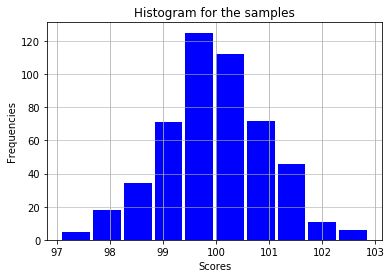

In [8]:
# making a histogram of the obtained results
averagesBS_pd = pd.Series(averagesBS)
averagesBS_pd.plot.hist(grid=True, rwidth=0.9, color='blue')

# adding labels and lines
plt.title('Histogram for the samples')
plt.xlabel('Scores')
plt.ylabel('Frequencies')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [9]:
# Use an external function
print(bs.bootstrap(samples, stat_func=bs_stats.mean))

99.97649288993058    (99.36380017102023, 100.58291296180356)


### 2.2. The A/B testing example

In [10]:
### The A/B test setup
# Score in the test group are 10% greater than in the control group,
# but the control group has 5x the number of observations as the test group

# simulate the 10% lift in the test group just to get data
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=5000)
ctrl = np.random.binomial(100, p=0.2, size=25000)

In [11]:
# descriptive statistics of the test group
stats.describe(test)

DescribeResult(nobs=5000, minmax=(7, 38), mean=22.0564, variance=17.292677575515103, skewness=0.11367626512214635, kurtosis=0.007355566737702102)

In [12]:
# descriptive statistics of the control group
stats.describe(ctrl)

DescribeResult(nobs=25000, minmax=(5, 38), mean=20.00032, variance=16.210408313932554, skewness=0.12797695752687258, kurtosis=0.012990407112271729)

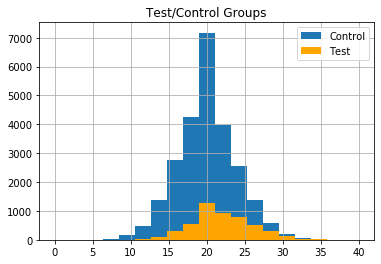

In [13]:
# a histogram of simulated trials
bins = np.linspace(start=0, stop=40, num=20)

plt.hist(ctrl, bins=bins, label='Control')
plt.hist(test, bins=bins, label='Test', color='orange')
plt.title('Test/Control Groups'); plt.grid()
plt.legend()
plt.show()

In [14]:
# calculate bootstrapped confidence interval for the percentage change 
print(bs.bootstrap_ab(test, ctrl, bs_stats.mean, bs_compare.percent_change))

10.280235516231748    (9.650699911138737, 10.926401761296658)


## 3. Mean value tests

In [15]:
# set parameters
n = 100 # sample size

d1 = np.random.uniform(low=1, high=6, size=n)
d2 = np.random.uniform(low=1, high=6, size=n)

In [16]:
# One-sample mean test

t_one, pVal_one = stats.ttest_1samp(d1, 3)

print("One-sample t-statistic = ", round(t_one,3))
print("One-sample p-value = ", round(pVal_one,3))

One-sample t-statistic =  2.111
One-sample p-value =  0.037


In [17]:
# Two-sample (independent) mean comparison test

t_twoind, pVal_twoind = stats.ttest_ind(d1, d2)

print("Two-sample t-statistic = ", round(t_twoind,3))
print("Two-sample p-value = ", round(pVal_twoind,3))

Two-sample t-statistic =  -0.744
Two-sample p-value =  0.458
